In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import import_ipynb
from Functions import generate_zigzag_coords, haldane_zigzag_probe, haldane_zigzag_pump, runge_kutta_step_probe, runge_kutta_step_pump, excite_chunk


In [37]:
import importlib
import variables
importlib.reload(variables)

from variables import n,m,c,cNN_mag,phi,M1,M2,chunk,timesteps,dt,g,mag

print('g=', g)
print('mag=' , mag)

from variables import n,m,c,cNN_mag,phi,M1,M2,chunk,timesteps,dt,g,mag

data = np.load(f"C:/Users/Unbekannter Nutzer/Desktop/codes/data/evolution_data_g={g}_mag={mag}.npz")
evolution_pump = data["evolution_pump"]
evolution_probe = data["evolution_probe"]



g= 5
mag= 2


In [33]:
np.shape(evolution_pump)

(2000, 800)

In [ ]:
X, Y = generate_zigzag_coords(n, m)
plt.rcParams['animation.embed_limit'] = 500  # Sets the limit to 50 MB
fig, ax = plt.subplots(figsize=(10, 10))
scat = ax.scatter(X, Y, c=[], cmap='viridis', s=80)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar = plt.colorbar(scat, cax=cax, label='Probe Probability Density')

# --- Increase font sizes ---
ax.set_xlabel("x (a.u.)", fontsize=24)
ax.set_ylabel("y (a.u.)", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)   # x,y ticks
ax.set_aspect('equal', adjustable='box')

cbar.set_label("Probe Probability Density", fontsize=22)
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels

def update(frame):
    prob_density = evolution_probe[frame]
    scat.set_array(prob_density)
    scat.set_clim(vmin=0, vmax=0.001)  # force the color scale
    ax.set_title(f"Time Step: {frame}", fontsize=26)
    return scat,

ani = FuncAnimation(fig, update, frames=range(0, timesteps, 100), blit=True)
import os

# Create an output folder for the frames
output_dir = f"C:/Users/Unbekannter Nutzer/Desktop/codes/codes/probe_frames_g={g}_mag={mag}"
os.makedirs(output_dir, exist_ok=True)

# Loop over the frames you want to save
for frame in range(0, timesteps, 1000):  # step size = 100
    prob_density = evolution_probe[frame]
    scat.set_array(prob_density)
    scat.set_clim(vmin=0, vmax=0.01)
    ax.set_title(f"Time Step: {frame}", fontsize=26)

    # Save the current figure
    fname = os.path.join(output_dir, f"frame_{frame:04d}.png")
    # plt.savefig(fname, dpi=150)   # increase dpi for higher resolution

plt.close(fig)

# ani.save(f"C:/Users/Unbekannter Nutzer/Desktop/codes/codes/probe_g={g}_mag={mag}.gif",
        #  writer='pillow', fps=20)

from IPython.display import HTML
HTML(ani.to_jshtml())


<Figure size 640x480 with 0 Axes>

In [ ]:
X, Y = generate_zigzag_coords(n, m)
plt.rcParams['animation.embed_limit'] = 500  # Sets the limit to 50 MB
fig, ax = plt.subplots(figsize=(10, 10))
scat = ax.scatter(X, Y, c=[], cmap='viridis', s=80)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
cbar = plt.colorbar(scat, cax=cax, label='Pump Probability Density')

# --- Increase font sizes ---
ax.set_xlabel("x (a.u.)", fontsize=24)
ax.set_ylabel("y (a.u.)", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)   # x,y ticks
ax.set_aspect('equal', adjustable='box')

cbar.set_label("Pump Probability Density", fontsize=22)
cbar.ax.tick_params(labelsize=16)  # colorbar tick labels

def update(frame):
    prob_density = evolution_pump[frame]
    scat.set_array(prob_density)
    scat.set_clim(vmin=0, vmax=mag**2)  # force the color scale
    ax.set_title(f"Time Step: {frame}", fontsize=26)
    return scat,

ani = FuncAnimation(fig, update, frames=range(0, timesteps, 100), blit=True)


# Create an output folder for the frames
output_dir = f"C:/Users/Unbekannter Nutzer/Desktop/codes/codes/pump_frames_g={g}_mag={mag}"
os.makedirs(output_dir, exist_ok=True)

# Loop over the frames you want to save
for frame in range(0, timesteps, 100):  # step size = 100
    prob_density = evolution_probe[frame]
    scat.set_array(prob_density)
    scat.set_clim(vmin=0, vmax=mag**2)
    ax.set_title(f"Time Step: {frame}", fontsize=26)

    # Save the current figure
    fname = os.path.join(output_dir, f"frame_{frame:04d}.png")
    plt.savefig(fname, dpi=150)   # increase dpi for higher resolution
plt.close(fig)

ani.save(f"C:/Users/Unbekannter Nutzer/Desktop/codes/codes/Pump_g={g}_mag={mag}.gif", writer='pillow', fps=20)

from IPython.display import HTML
HTML(ani.to_jshtml())


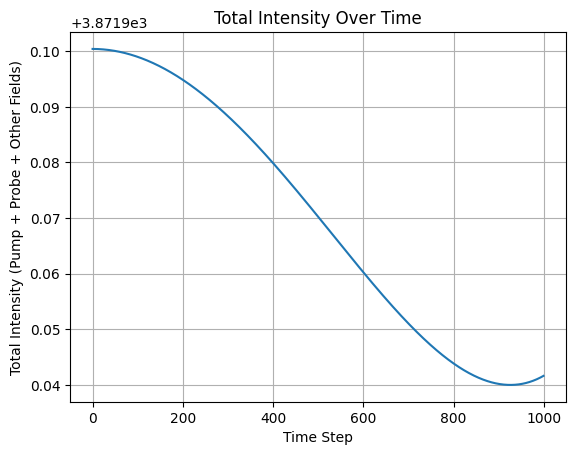

In [71]:
total_intensity_all_fields = []
for i in range(timesteps):
    # Get the wave function for the pump and probe (or other fields)
    psi_pump_at_frame = evolution_pump[i] 
    psi_probe_at_frame = evolution_probe[i] 
    
    # Calculate the intensity for each field
    intensity_pump = np.sum(np.abs(psi_pump_at_frame)**2)
    intensity_probe = np.sum(np.abs(psi_probe_at_frame)**2)
    
    # If you have more fields, include their intensities as well
    total_intensity = intensity_pump + intensity_probe  # Add all field intensities
    total_intensity_all_fields.append(total_intensity)

# Plot the total intensity for all fields
plt.plot(np.arange(timesteps), total_intensity_all_fields)
plt.xlabel("Time Step")
plt.ylabel("Total Intensity (Pump + Probe + Other Fields)")
plt.title("Total Intensity Over Time")
plt.grid(True)
plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Unbekannter Nutzer\AppData\Local\Temp\ipykernel_26612\893053863.py:1: SyntaxWarning: invalid escape sequence '\c'
  ani.save(f"C:/Users/Unbekannter Nutzer/Desktop/codes\codes/Pump_g={g}_mag={mag}.gif", writer='pillow', fps=20)


In [10]:
# Calculate expected total intensity in the inner chunk at t=0
chunk_indices = []
for ix in range(n):
    for iy in range(m):
        if (n // 2 - chunk <= ix <= n // 2 + chunk) and (m // 2 - chunk <= iy <= m // 2 + chunk):
            a = 2 * (iy * n + ix)
            b = a + 1
            chunk_indices.extend([a, b])  # both A and B sites

# Expected initial total intensity
initial_chunk_total = len(chunk_indices) * mag**2

# Compute deviation over time
chunk_deviations = []
for pump_t in evolution_pump:
    current_chunk_total = np.sum(pump_t[chunk_indices])
    deviation = initial_chunk_total - current_chunk_total
    chunk_deviations.append(deviation)

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(chunk_deviations)
plt.xlabel("Timestep")
plt.ylabel("Deviation from initial chunk intensity")
plt.title("Loss of Pump Intensity in Inner Chunk Over Time")
plt.grid(True)
plt.savefig(f"inner_chunk_intensity_mag={mag}.png", dpi=300)
plt.show()


In [8]:
np.shape(evolution_pump)  # Check the shape of the evolution data

(500000, 800)

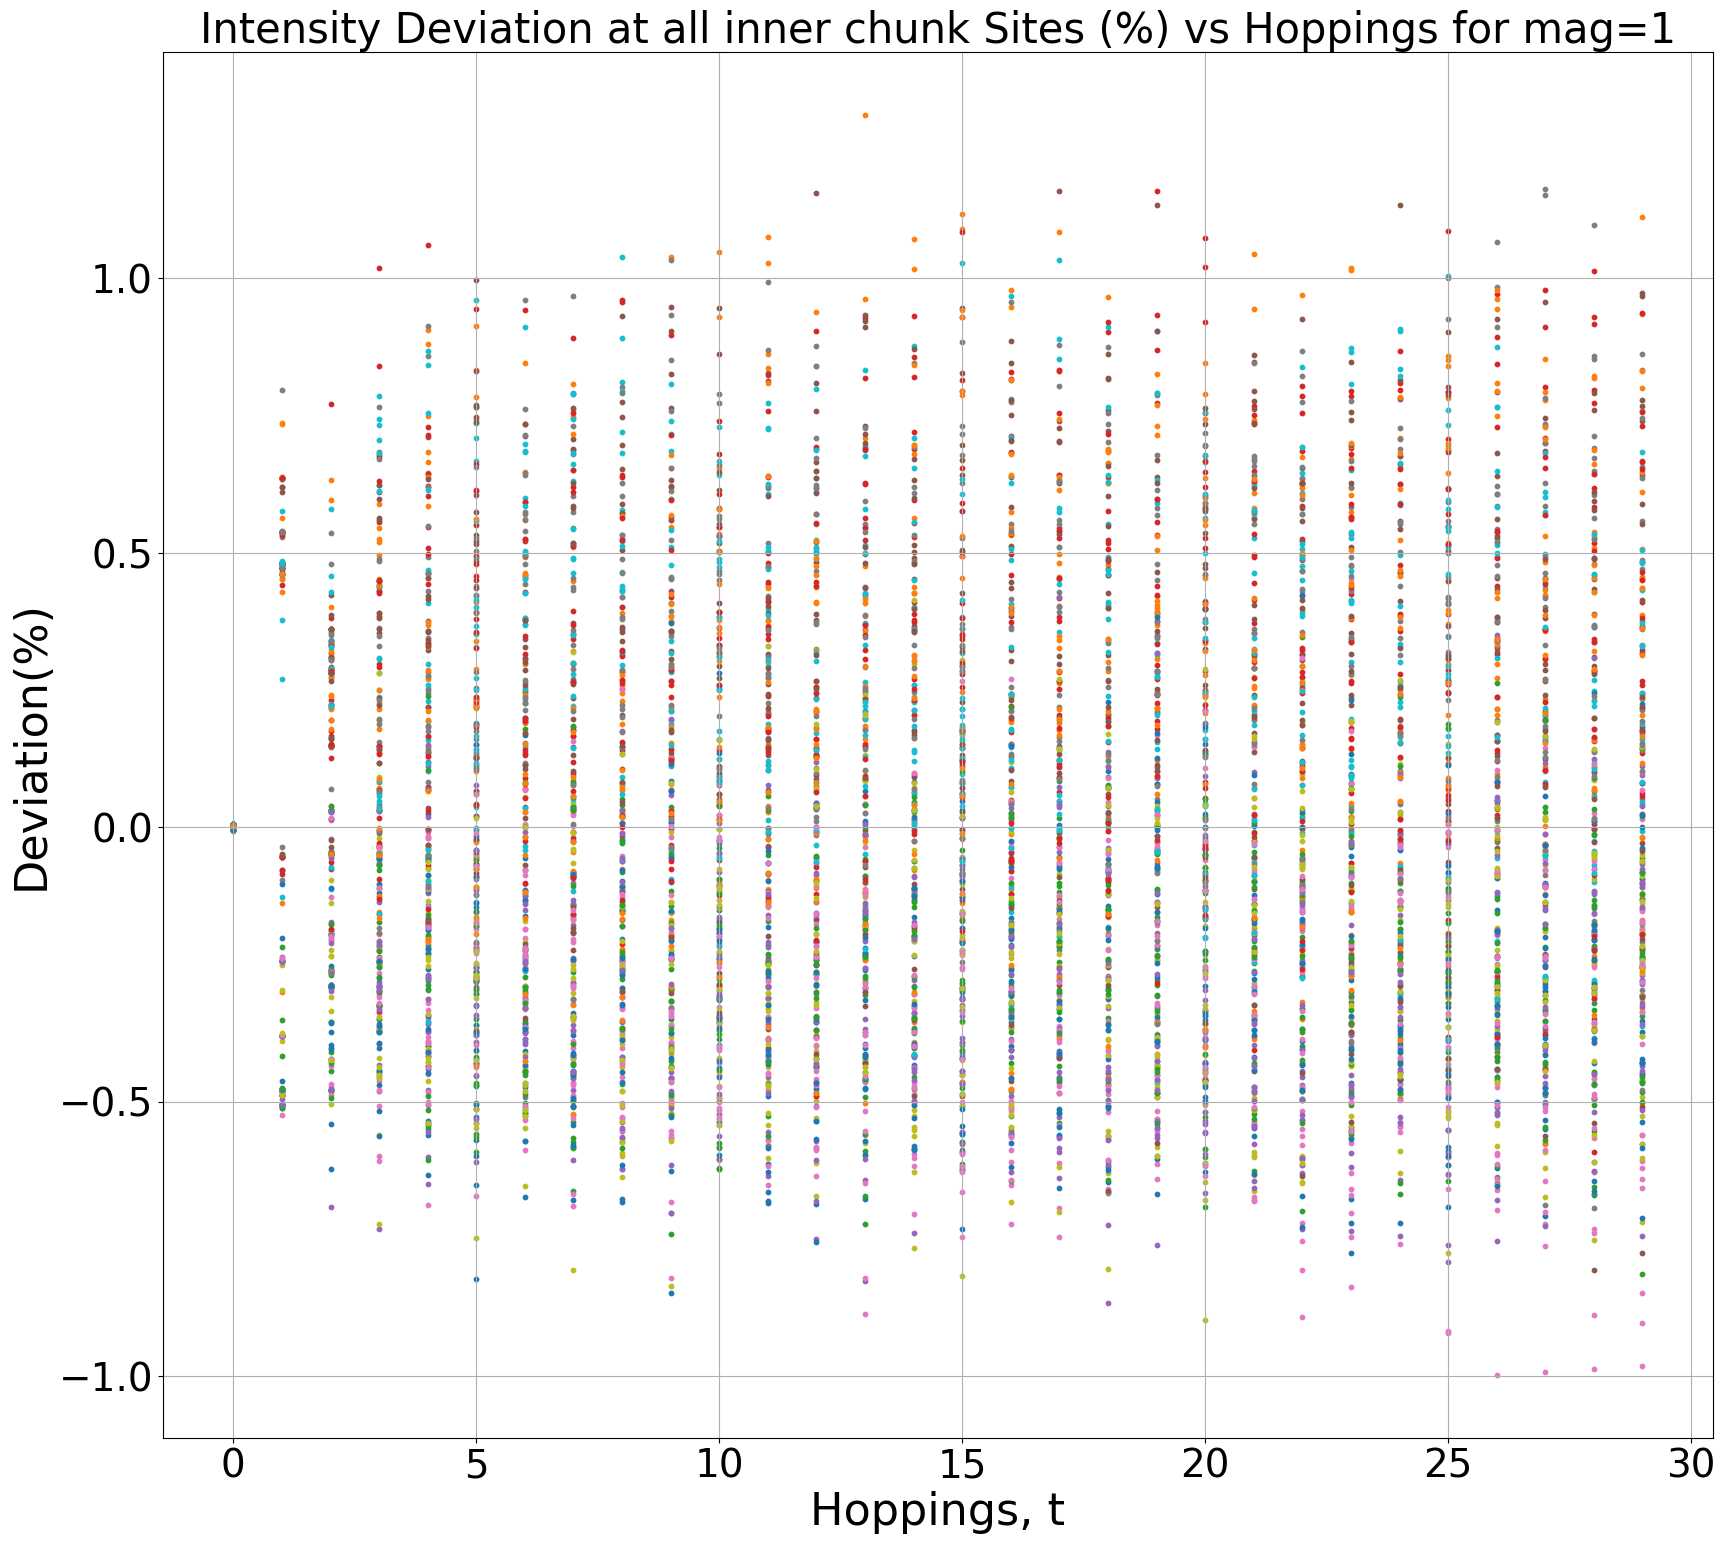

In [14]:
plt.figure(figsize=(20, 18))  # One figure for all plots

for k in chunk_indices:
    site_index = k
    site_values = [evolution_pump[i][site_index] for i in range(0, timesteps, 100)]
    plt.scatter(np.arange(0, timesteps, 100)*dt, np.array(site_values) - mag**2, s=10, label=f"Site {site_index}")

# Customize fonts with larger sizes
plt.xlabel("Hoppings, t", fontsize=32)  # Increased font size for x-axis label
plt.ylabel("Deviation(%)", fontsize=32)  # Increased font size for y-axis label
plt.title(f"Intensity Deviation at all inner chunk Sites (%) vs Hoppings for mag={mag}", fontsize=30)  # Increased font size for title

# Customize tick size with larger font size
plt.tick_params(axis='both', which='major', labelsize=28)  # Increased font size for ticks

plt.grid(True)
# plt.legend(fontsize=16)  # Uncomment if you want the legend with larger font
plt.savefig(f"pump_intensity_multiple_sites_mag={mag}.png", dpi=750)
plt.show()




C:\Users\Unbekannter Nutzer\AppData\Local\Temp\ipykernel_25964\456933712.py:36: UserWarning: Mismatched number of handles and labels: len(handles) = 242 len(labels) = 2
  plt.legend(handles=legend_handles, labels=['A-site', 'B-site'], fontsize=28)


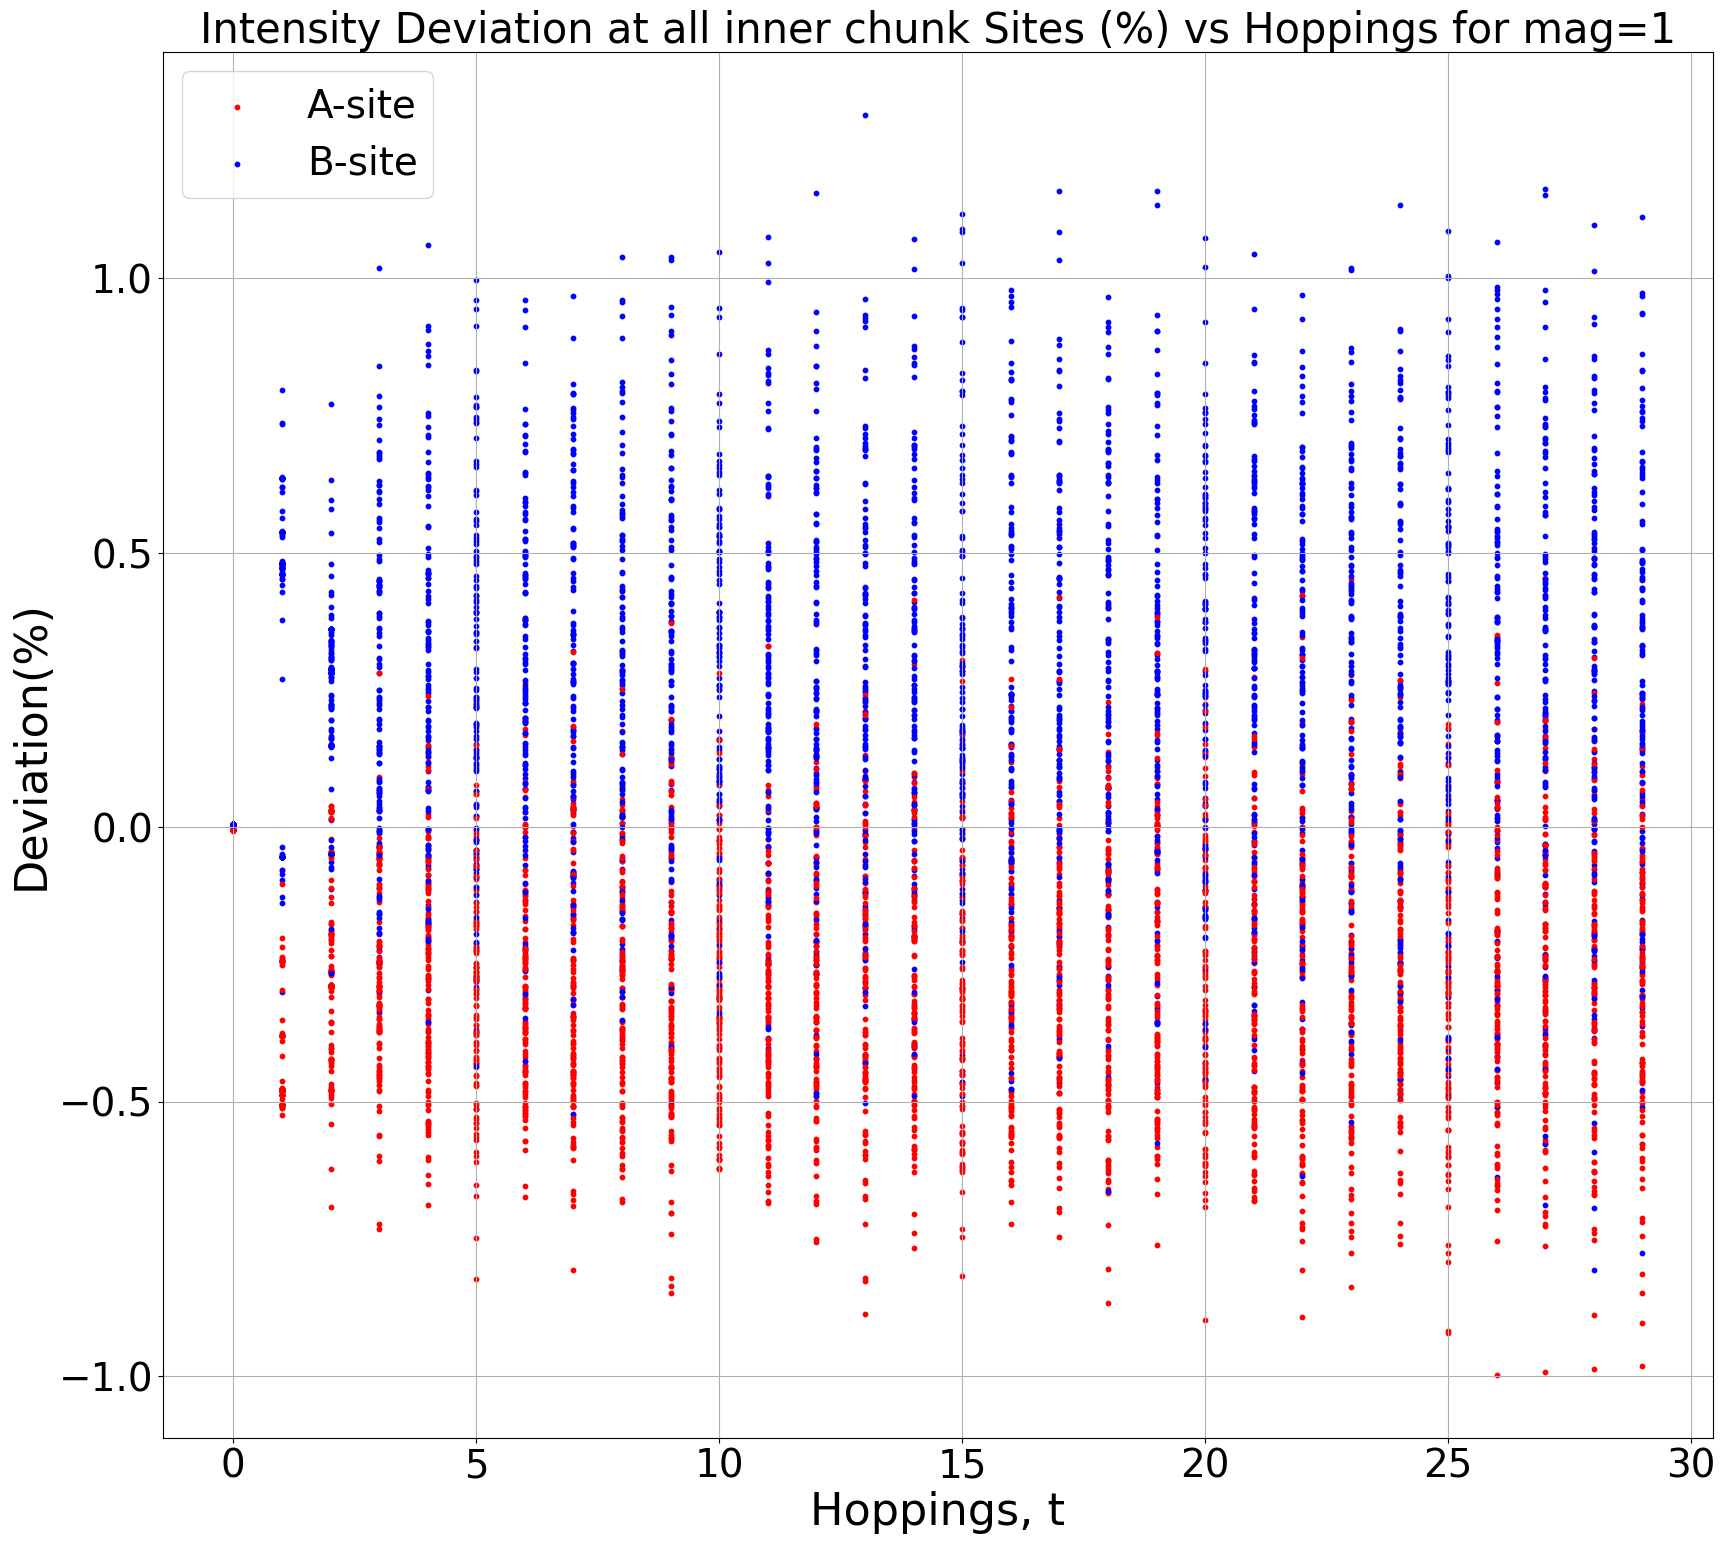

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 18))  # One figure for all plots

# Initialize the legend handles
legend_handles = []

for k in chunk_indices:
    site_index = k
    site_values = [evolution_pump[i][site_index] for i in range(0, timesteps, 100)]
    
    # Set the color based on whether the site index is odd or even
    color = 'blue' if site_index % 2 != 0 else 'red'
    
    # Plot the points with the chosen color
    scatter = plt.scatter(np.arange(0, timesteps, 100) * dt, np.array(site_values) - mag**2, s=10, label=f"Site {site_index}", color=color)

    # Add only one legend entry for each color (Red for A-site, Blue for B-site)
    if color == 'red' and 'A-site' not in [h.get_label() for h in legend_handles]:
        legend_handles.append(scatter)
    elif color == 'blue' and 'B-site' not in [h.get_label() for h in legend_handles]:
        legend_handles.append(scatter)

# Customize fonts with larger sizes
plt.xlabel("Hoppings, t", fontsize=32)  # Increased font size for x-axis label
plt.ylabel("Deviation(%)", fontsize=32)  # Increased font size for y-axis label
plt.title(f"Intensity Deviation at all inner chunk Sites (%) vs Hoppings for mag={mag}", fontsize=30)  # Increased font size for title

# Customize tick size with larger font size
plt.tick_params(axis='both', which='major', labelsize=28)  # Increased font size for ticks

plt.grid(True)

# Manually add the legend with 'A-site' and 'B-site' labels
plt.legend(handles=legend_handles, labels=['A-site', 'B-site'], fontsize=28)

plt.savefig(f"A_B_pump_intensity_multiple_sites_mag={mag}.png", dpi=750)
plt.show()
